In [1]:
#pip install yfinance==0.1.63

In [2]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
%matplotlib inline
import yfinance as yf

In [4]:
# Retrieve AMZN data
amzn_data = yf.download("AMZN", start = "2010-01-01", end = "2021-05-28")

[*********************100%***********************]  1 of 1 completed


In [5]:
# Visualize top rows
amzn_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


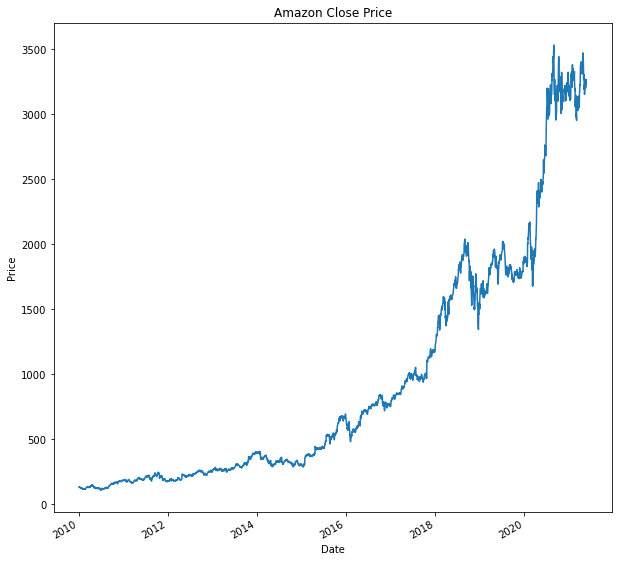

In [6]:
# lets take a look at the closing prices for Amzn
close = amzn_data["Close"].plot(figsize = (10,10), title='Amazon Close Price', ylabel = "Price")

In [7]:
# Trim the data so it is from 2015 and on
amzn_data = amzn_data.loc["2015-01-01":, :]
amzn_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


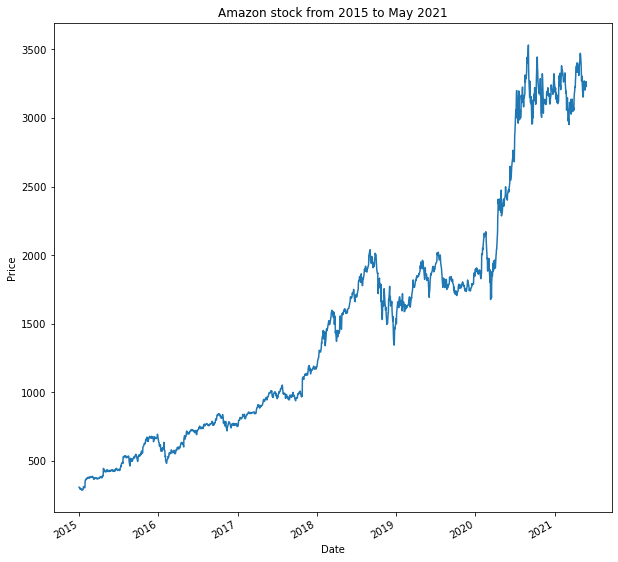

In [70]:
#plot the close price from 2015 and on
amzn_data["Close"].plot(figsize=(10,10), title='Amazon stock from 2015 to May 2021', ylabel = "Price");

In [9]:
# We want to look at the noise and the trend within this plot, we will use the Hodrick-Prescott-Filter to separate the noise and the trend
# We make a new data set just for the Close and then we will add columns noise and trend to it
# in order to do this we need to import the statsmodel 
import statsmodels.api as sm
# We are using the Hodrick-Prescott to break the close column into a noise variable and a trend variable
amzn_noise, amzn_trend = sm.tsa.filters.hpfilter(amzn_data.Close)

In [10]:
# Construct a new dataframe with just the close and trend and noise
new_df = pd.DataFrame(amzn_data["Close"])
new_df["Noise"] = amzn_noise
new_df["Trend"] = amzn_trend

In [11]:
new_df.head()

,Close,Noise,Trend
Date,,,
2015-01-02,308.519989,21.174360,287.345629
2015-01-05,302.190002,13.363851,288.826151
2015-01-06,295.290009,4.970102,290.319907
2015-01-07,298.420013,6.571531,291.848483
2015-01-08,300.459991,7.023420,293.436571


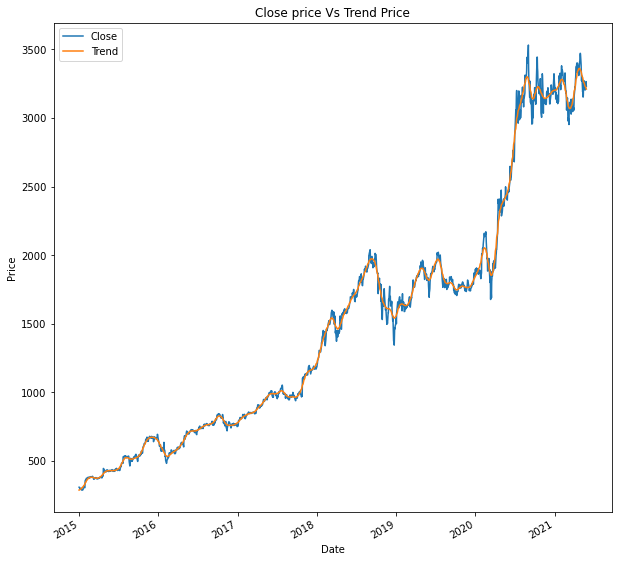

In [59]:
# we should compare our Close price to our trend pice 
new_df[["Close", "Trend"]]["2015-01-01":].plot(figsize=(10,10), title = "Close price Vs Trend Price", ylabel = "Price");

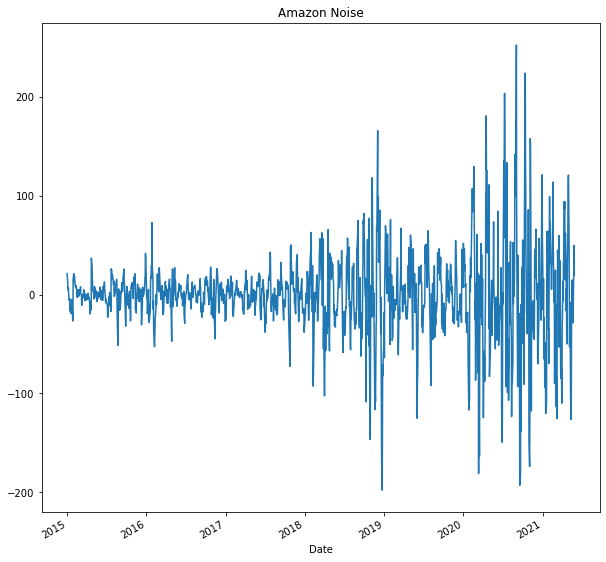

In [71]:
# lets plot the noise and see what it looks like
new_df["Noise"].plot(figsize=(10,10), title = "Amazon Noise");

## Forecast Returns with an ARMA Model

In [14]:
# We want to use the ARMA Model to help predict the future returns
# To do this we need to make a new dataframe and add a column "Retruns"
# The frist graph we plotted of the Close prices was not a stationary graph so we need to make that a stationary graph
amzn_returns = pd.DataFrame(amzn_data["Close"].pct_change() * 100).dropna()
amzn_returns.rename(columns = {"Close" : "Returns"}, inplace = True)
amzn_returns.head()

,Returns
Date,
2015-01-05,-2.051727
2015-01-06,-2.283330
2015-01-07,1.059977
2015-01-08,0.683593
2015-01-09,-1.174865


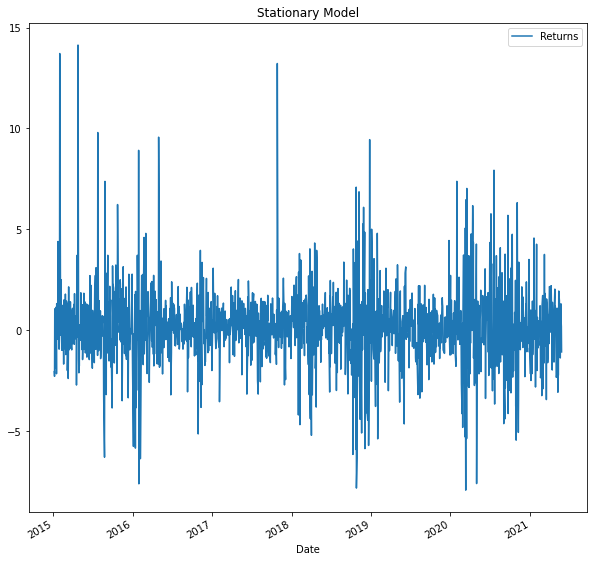

In [55]:
#plot model to make sure it is stationary
# This graph is not stationary
amzn_returns.plot(figsize =(10,10), title = "Stationary Model"); 

In [16]:
# We now need to plot the auto-correlation and partial-autocorrelation for the returns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

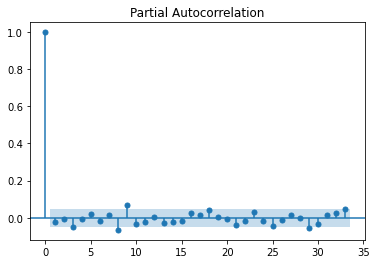

In [73]:
#plot the partial autocorrelation to get number of outliers
pacf = plot_pacf(amzn_returns)

In [18]:
# When we anaylze this graph we can see there is 1 significant outlier on both and there is 1 other outlier that is less signaficant 
# based on this grpah we can use an order of (1,1)
from statsmodels.tsa.arima_model import ARMA

In [19]:
# We can now create the ARMA model using the return values and the order
# The order variable is defining the AR and the MA or the Auto-Regressive and Moving Average, both of these components 
# will help predict the future values based on the past values
model = ARMA(amzn_returns, order = (5,1))

C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [20]:
# Set results equal to model.fit so we fit the model to the data
results = model.fit()

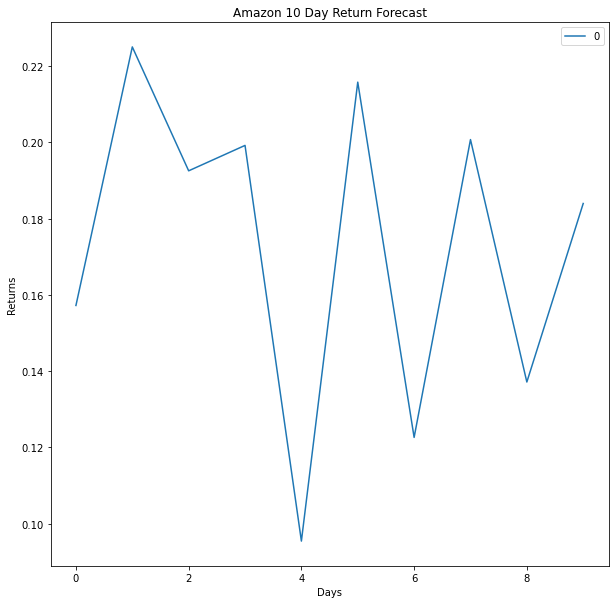

In [58]:
# We will now plot the forecasted return for the next 10 days for the return on the amazon stock
amzn_forecast = pd.DataFrame(results.forecast(steps = 10)[0]).plot(title = "Amazon 10 Day Return Forecast", xlabel = "Days", ylabel = "Returns", figsize = (10,10))
amzn_forecast;

In [22]:
# Plot the summary of the model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 1611
Model:                     ARMA(5, 1)   Log Likelihood               -3339.130
Method:                       css-mle   S.D. of innovations              1.923
Date:                Thu, 22 Jul 2021   AIC                           6694.260
Time:                        14:48:29   BIC                           6737.336
Sample:                             0   HQIC                          6710.250
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1645      0.045      3.673      0.000       0.077       0.252
ar.L1.Returns    -0.8245      0.095     -8.715      0.000      -1.010      -0.639
ar.L2.Returns    -0.0281      0.032     -0.867      0.386      -0.092       0.035
ar.L3.Returns    -0.0573      0.032     -1.776      0.076      -0.121       0.006
ar.L4.Returns    -0.0472      0.033     -1.447      0.148      -0.111       0.017
ar.L5.Returns     0.0295      0.026      1.128      0.259      -0.022       0.081
ma.L1.Returns     0.8023      0.092      8.764      0.000       0.623       0.982
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4231           -0.2664j            1.4478           -0.4705
AR.2           -1.4231           +0.2664j            1.4478            0.4705
AR.3            0.5645           -2.1337j            2.2071           -0.2088
AR.4            0.5645           +2.1337j            2.2071            0.2088
AR.5            3.3161           -0.0000j            3.3161           -0.0000
MA.1           -1.2465           +0.0000j            1.2465            0.5000
-----------------------------------------------------------------------------
"""

## The big question is: did this model work?
* The short answer yes.
* When interpresting the ARMA model results we want to first look at the P>|z| or the p values. This will tell us if the model was accurate or not, if those numbers were less than or equal to 0.05 we can say that this model was 95% accurate. If it was 0 like it is in this case we can say it was 100% accurate at prediciting the next 10 days. 
* After we look at the p values we can then look at the coef or the coefficients. This tells us what numbers where plugged into the ARMA formula, the constant was used for the mu value (μ), the ar.L1 was used for the AR or Auto-Regressive and then the ma.L1 was used for the MA or Moving average. 
* If we look at the coef and the std err we can see that the error for the coef is small, if we wanted this to be even more accruate we would want lower errors but in this case the errors are fine but could be smaller.

C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

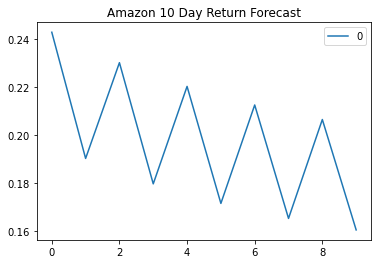

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 1611
Model:                     ARMA(2, 2)   Log Likelihood               -3341.014
Method:                       css-mle   S.D. of innovations              1.924
Date:                Thu, 22 Jul 2021   AIC                           6694.029
Time:                        14:48:31   BIC                           6726.337
Sample:                             0   HQIC                          6706.022
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1648      0.039      4.201      0.000       0.088       0.242
ar.L1.Returns    -0.1128      0.138     -0.817      0.414      -0.383       0.158
ar.L2.Returns     0.8748      0.137      6.368      0.000       0.606       1.144
ma.L1.Returns     0.0972      0.126      0.774      0.439      -0.149       0.344
ma.L2.Returns    -0.9027      0.126     -7.183      0.000      -1.149      -0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0067           +0.0000j            1.0067            0.5000
AR.2            1.1356           +0.0000j            1.1356            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.1077           +0.0000j            1.1077            0.0000
-----------------------------------------------------------------------------
"""

* Looking at the *p*-values we can see the first AR and MA we very accruate however the second AR and MA were not. I would not use this model to predict the returns of the stock. The *p*-values for them all need to be atlease 0.1 but prefereably below 0.05. The AR2 and the MA2 have *p*-values of .414 and .439.

In [28]:
# Lets use the same data however we use the ARIMA model
# The main difference between using the ARMA model and the ARIMA model is you do not have to make your dataset stationary.
# Above we used the pct_change function on the close to make it stationary for ARIMA we can skip this step and go through with the rest of the calulations

## ARIMA Model Forecast

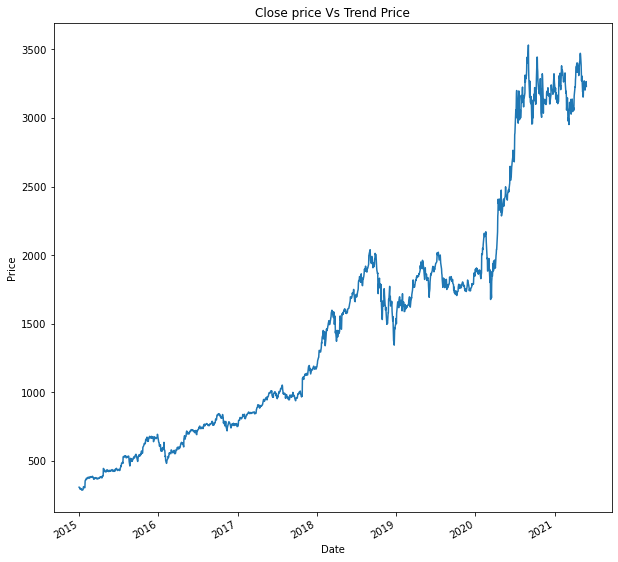

In [65]:
# Plot just the close data from the original dataset to see if this is stationary or not
amzn_data.Close.plot(figsize=(10,10), title = "Close price Vs Trend Price", ylabel = "Price"); 

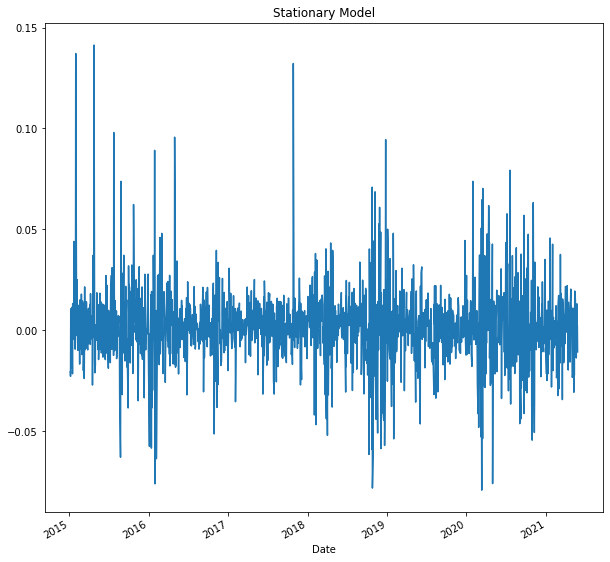

In [66]:
# As excpected this is nonstationary data, when we put this data into the ARIMA model we have to to choose our order. 
# The order will be similar to the ARMA model because we are using the same number for the AR and MA (1,1)
# However the ARIMA model calls for one more input into the order and this will be the middle number and it lets the model know how many time to diff the dataset or do a pct_change
# Typically for financial data we will use 1
# We can check and see if this data would need to use more than one pct_changes ro diffs by looking at a graph
pct_change = amzn_data.Close.pct_change().plot(figsize =(10,10), title = "Stationary Model");

In [31]:
# This is stationary so we will only have to use 1 in our order parameter

In [32]:
# With this model we also want to preditc the closing price of Amazon.
from statsmodels.tsa.arima.model import ARIMA
ARIMA_model = ARIMA(amzn_data["Close"], order = (1,1,1))

C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [33]:
# We now need to fit the ARIMA Model
# If an error appears that states ConvergenceWarning the below line of code can be used inside the fit paranthesis
#method_kwargs = {"maxiter":200}
# if this error appears it is letting you know that it did not iteriate over enough data
# it reached the deafault max and then stated that there are more possibilites but the default stopped us here
# the maxiter :200 will iterate over the data 200 times to get make sure it uses enough data 
ARIMA_results = ARIMA_model.fit()

In [34]:
ARIMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1612
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7966.135
Date:                Thu, 22 Jul 2021   AIC                          15938.271
Time:                        14:48:32   BIC                          15954.424
Sample:                             0   HQIC                         15944.267
                               - 1612                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6253      0.125     -5.004      0.000      -0.870      -0.380
ma.L1          0.5714      0.132      4.324      0.000       0.312       0.830
sigma2      1154.9283     19.341     59.714      0.000    1117.021    1192.836
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3261.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              21.20   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* If we look at the p values for this model they are all 0 which indicates this model is very accurate. The ceof and sttd err do have spread between then however it does look to be to significant. Overall this model would be good for predicitng returns for Amazon

## Ploted Forecast for ARIMA

C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


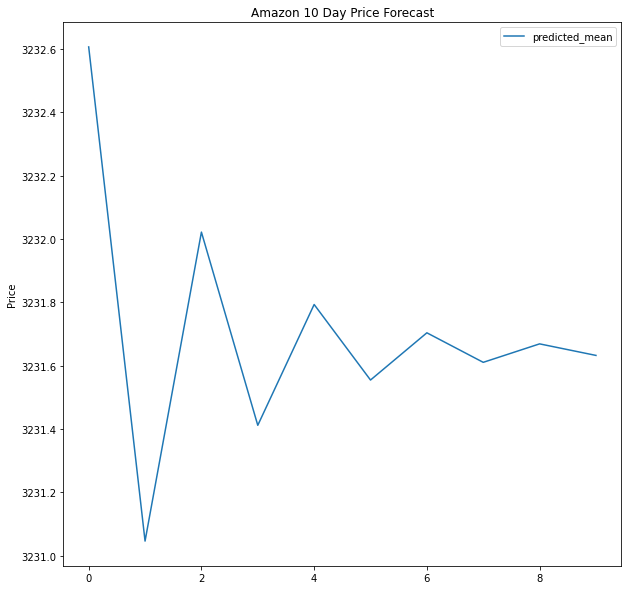

In [74]:
# We now need to plot the forecaast for this model
# I will use 10 steps to look at the prices for the next 10 days
ARIMA_plot = pd.DataFrame(ARIMA_results.forecast(steps = 10))
ARIMA_plot.reset_index(inplace=True, drop=True)
ARIMA_plot.plot(figsize = (10,10),title = "Amazon 10 Day Price Forecast", ylabel = "Price");

In [36]:
# When interpretting this graph it looks like the the price will fluctuate up and down over the next 
# 10 days before it levels out at the end of the 10 day mark

In [37]:
#ARIMA_results.forecast(steps = 10)

In [38]:
# Next we should look at the volitility of this stock 
# This will help up when we are trading this particular stock because it can help stay away from loss


## Forecasting Garch to determine Volatility

In [39]:
from arch import arch_model

In [40]:
# Again we will be using the returns of Amazon Stock
amzn_returns.head()

,Returns
Date,
2015-01-05,-2.051727
2015-01-06,-2.283330
2015-01-07,1.059977
2015-01-08,0.683593
2015-01-09,-1.174865


In [41]:
# p and q are our lags that we have been using and if you are unsure we can look back at the pacf_model to get this 
model_garch = arch_model(amzn_returns, mean="Zero", vol="GARCH", p=1, q=1)

In [42]:
# Fit the garch model
# disp="off" just doesn't display the fitting
garch_fit = model_garch.fit(disp="off")

In [43]:
# retrieve our summary
garch_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3233.91
Distribution:                  Normal   AIC:                           6473.83
Method:            Maximum Likelihood   BIC:                           6489.98
                                        No. Observations:                 1611
Date:                Thu, Jul 22 2021   Df Residuals:                     1611
Time:                        14:48:33   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3368      0.135      2.501  1.237e-02 [7.291e-02,  0.601]
alpha[1]       0.1739  3.873e-02      4.490  7.108e-06 [9.799e-02,  0.250]
beta[1]        0.7543  3.194e-02     23.618 2.517e-123   [  0.692,  0.817]
==========================================================================

Covariance estimator: robust
"""

In [44]:
# based on these results this would be a good tool to predict the volatility 
# when there is a e-02 that means to put two zeros in from of the 1.237 
# it would look like 0.001237 or 0.0000007108 both of these are well below 0.05 
# looking at the coef and std err there seems to be a small window of error which is good to see as well


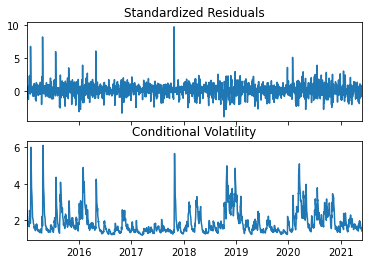

In [45]:
# Lets plot the garch model and look at the voalatility of amazon stock
garch_plot = garch_fit.plot()


In [46]:
# lets look at the next 5 days of volatility using this model.
prediction_days = 5
forecast = garch_fit.forecast(start = "2021-05-27", horizon = prediction_days)
forecast

C:\Users\Justi\anaconda3\envs\alpacaenv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [47]:
# we now want to annualize this forecast
ann_forecast = np.sqrt(forecast.variance.dropna()*252)
ann_forecast

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2021-05-27,22.861431,23.874649,24.778081,25.588129,26.317724


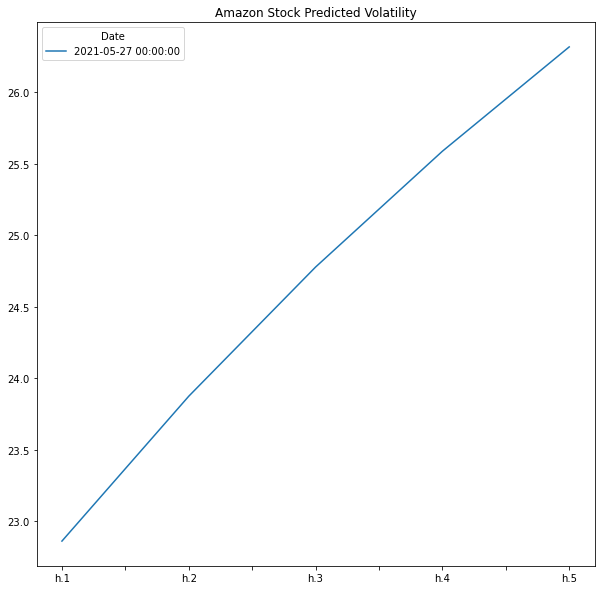

In [77]:
# To use this data in a plot we need to transpose it so it will fit a graph better
final_plot = ann_forecast.T
final_plot.plot(title = "Amazon Stock Predicted Volatility", figsize = (10,10));